# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
# First look at dataframe
df.tail()

,temperature,gender,heart_rate
125,96.3,M,70.0
126,97.7,M,77.0
127,98.2,F,73.0
128,97.9,M,72.0
129,98.7,F,59.0


### Is data normal?
Before testing the data for normality we summarize and visualize the data.

In [4]:
x = df.temperature
print('Mean: ',x.mean())
print('Standard deviation: ', x.std())
#stats.describe(x)

Mean:  98.24923076923078
Standard deviation:  0.7331831580389454


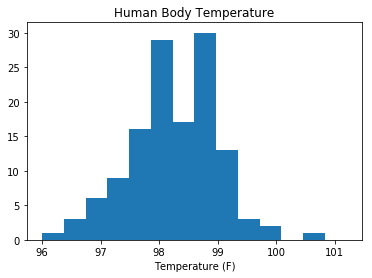

In [5]:
# visualizing with histogram
plt.hist(x, bins=14, range=[96,101.2])
plt.xlabel('Temperature (F)')
plt.title('Human Body Temperature')
plt.show()

The graph hints at normality but does not allow us to conclude so, as it shows a thicker left tail. We use instead the _normaltest_ function from the scipy.stats library to run a Chi-square test.

In [6]:
# testing the data for normality
stats.normaltest(x)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

Normaltest returned a Chi-Square statistics of 2.7 with a p-value of roughly .26 which indicates that the data seems to be approximately normally distributed. This implies that the sampling distribution can also be considered normally distributed, regardless of the sample size. 
In addition, here we have a large sample size of 130 values and the values are independent, as one person's body temperature will not affect another person's body temperature. All conditions are satisfied to apply a one-sample test.

### One-Sample Hypothesis Test
Our Null Hypothesis will be that human body temperature is 98.6 degrees Fahreneit, while the alternative hypothesis will be that human body temperature is different than 98.6 degrees Fahrenheit. We will employ a two-tailed hypothesis test, using Student's t-distribution, as we are not given the population standard deviation.

For the test we will use the scipy.stats function stats.ttest_1samp which returns the test statistics and the p-value for a two-tailed test.

In [7]:
# two-tailed t-test
stats.ttest_1samp(x, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The p-value here is extremely small, roughly 0.0000002 which indicates strongly that the human body temperature is not 98.6 but it is different. Given the small p-value and the large sample size the z-test will provide similar results.

In [8]:
# computing the p-value of the z-test using the statistic value found from t-test
stats.norm.cdf(-5.4548)

2.4513998094608412e-08

The p-value from the z-test is even smaller than that from the t-test. Such result is expected as tails in the t-distribution are "fatter".

### Abnormal temperatures
We will consider a temperature abnormal if it has less than (arbitrarily) 5% chance of happening when the temperature considered "normal" is 98.6.

In [9]:
# using stats.norm function and approximating the populatio standard deviation with the sample standard deviation
t_score = stats.t.ppf(.975, len(x)-1)
margin_of_error = t_score*x.std()
print('Margin of error: ',margin_of_error)
confidence_interval = stats.t.interval(.95, len(x)-1, loc=x.mean(), scale=x.std())
print('95% confidence interval:', confidence_interval)

Margin of error:  1.45062083491
95% confidence interval: (96.798609934325754, 99.699851604135802)


Given our 95% confidence interval we would deem abnormal any value lower than 96.8F or higher than 99.7F.

### Gender difference?

In [10]:
# separate male and female readings
male_sample = df.temperature[df.gender=='M']
female_sample = df.temperature[df.gender=='F']
# checking that all values are accounted for
print('Values accounted for: ', len(male_sample)+len(female_sample),' out of ', len(df.temperature))

Values accounted for:  130  out of  130


To test for any difference in temperature we will use a two-sample t-test. First, though, we compute mean and standard deviation of the two samples.

In [11]:
print('Males: mean=',male_sample.mean(),' standard deviation=', male_sample.std())
print('Females: mean=',female_sample.mean(),' standard deviation=', female_sample.std())

Males: mean= 98.1046153846154  standard deviation= 0.6987557623265908
Females: mean= 98.39384615384613  standard deviation= 0.7434877527313665


There seem to be a small difference in temperatures, where women temperatures are higher by about 0.3 degrees Fahrenheit.

In [12]:
stats.ttest_ind(male_sample, female_sample)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

Surprisingly, the test indicates that the difference in temperatures between genders is significant if compared to the commonly used 5% significance level. Looking back at the histogram of the temperatures we can see that there appear to be three values isolated from the rest, those higher than 99.7F. We will repeat the analysis excluding these _abnormal_ values. For completeness we will also take out _abnormally_ low values as well, defined by being less than 96.8F.

We notice that while the _abnormally_ low values are equally distributed the _abnormally_ high are not.

In [13]:
df.gender[df.temperature < 96.8]

11     F
39     F
105    M
125    M
Name: gender, dtype: object

In [14]:
df.gender[df.temperature > 99.7]

91     F
96     F
116    F
Name: gender, dtype: object

In [15]:
# excluding abnormal values
a = df[(df.temperature >= 96.8) & (df.temperature <= 99.7)]

In [16]:
# separating males and females
male = a.temperature[a.gender=='M']
print(len(male))
female = a.temperature[a.gender=='F']
print(len(female))

63
60


In [17]:
# comparing means among genders
print('Males: ', male.mean(),' Female: ', female.mean())

Males:  98.15555555555558  Female:  98.3633333333333


In [18]:
# test
stats.ttest_ind(male, female)

Ttest_indResult(statistic=-1.9167691319321167, pvalue=0.057625398419600696)

After removing abnormal values and in particular the three abnormally high female values the difference between the means has decreased to about 0.2F and at 5% it is not significant anymore. There might be many causes as to why this has happened, a plausible hypothesis could be that during the menstrual period women temperatures rise, and in some cases _abnormally_, thus lifting the average temperature up to a level that shows statistical significance at the 5% level.

### Conclusion
This project looked at human body temperature to determine whether the mean normal body temperature is 98.6 degrees Fahrenheit. The sample data consists of reading from 130 individuals in equal amounts males and females. A one-sample t-test is conducted on the sample mean of 98.25F, thus showing a 0.35F difference with the assumed normal of 98.6F. The test results in a p-value of 2E-07, a very small value, showing that such difference cannot be due to randomness of the sample. It appears that temperatures are indeed different than 98.6, in particular they seem lower than 98.6F, based on the sample result.

The histogram below helps us notice that more values are lower than 98.6F rather than higher.

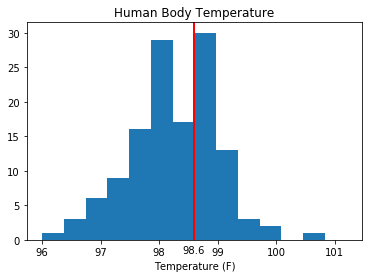

In [19]:
# visualizing with histogram
plt.hist(x, bins=14, range=[96,101.2])#, normed='True')
plt.axvline(98.6, linewidth=2, color='r')
plt.text(98.4,-2,'98.6')
plt.xlabel('Temperature (F)')
plt.title('Human Body Temperature')
plt.show()

Such histogram, seems to also indicate that the data is somewhat bimodal. Further analysis of the values divided by gender confirms that the two groups have different average temperatures, contributing to the bimodal appearence of the graph. The difference between the means is about 0.3 degrees Fahrenheit (98.4F for females, 98.1F for males) and the corresponding p-value is 0.024. This means that there is a 2.4% chance that such difference is due to randomness of the sample, thus making such difference statistically significant.

A computation of the 95% confidence interval (96.80, 99.70) identifies values which are abnormal: those residing outside of this interval. The 3 _abnormally_ high values in the sample are of females, which suggests that this might be more than a coincidence. A second analysis which excludes the abnormal values, high and low, fails to show significance. This should caution us in accepting the prior conclusion and calls for a second analysis, which should include more data to determine if the difference in temperatures really exists.
